# Ensemble Learning Techniques
- Ensemble Learning helps improve machine learning results by combining several models to improve predictive performance compared to a single model. 

## Introduction 
Suppose you wanted to purchase a car.Now by just visiting the first car company and based on the dealer's advise will we straight away make a buy on a car? Answer is defenitely a big NO right?

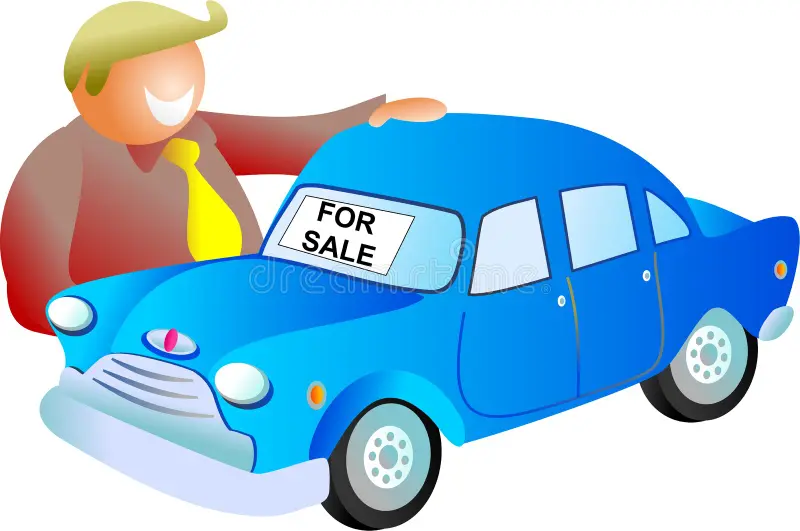

So what we do is first decide whether which car to buy ,whether it is a new or used car ,type of car,model and year of manufacture, look for list of dealers ,look for discounts/offers ,customer reviews,opinion from friends and family, performance ,fuel efficiency and obvious any car buyer will for the best price range etc.


In short, you wouldn’t directly reach a conclusion, but will instead make a decision considering all the above mentioned factors before we decide on the best choice.


`Ensemble models` in machine learning operate on a similar idea.


Ensemble Learning helps improve machine learning results by combining several models to improve predictive performance compared to a single model. 

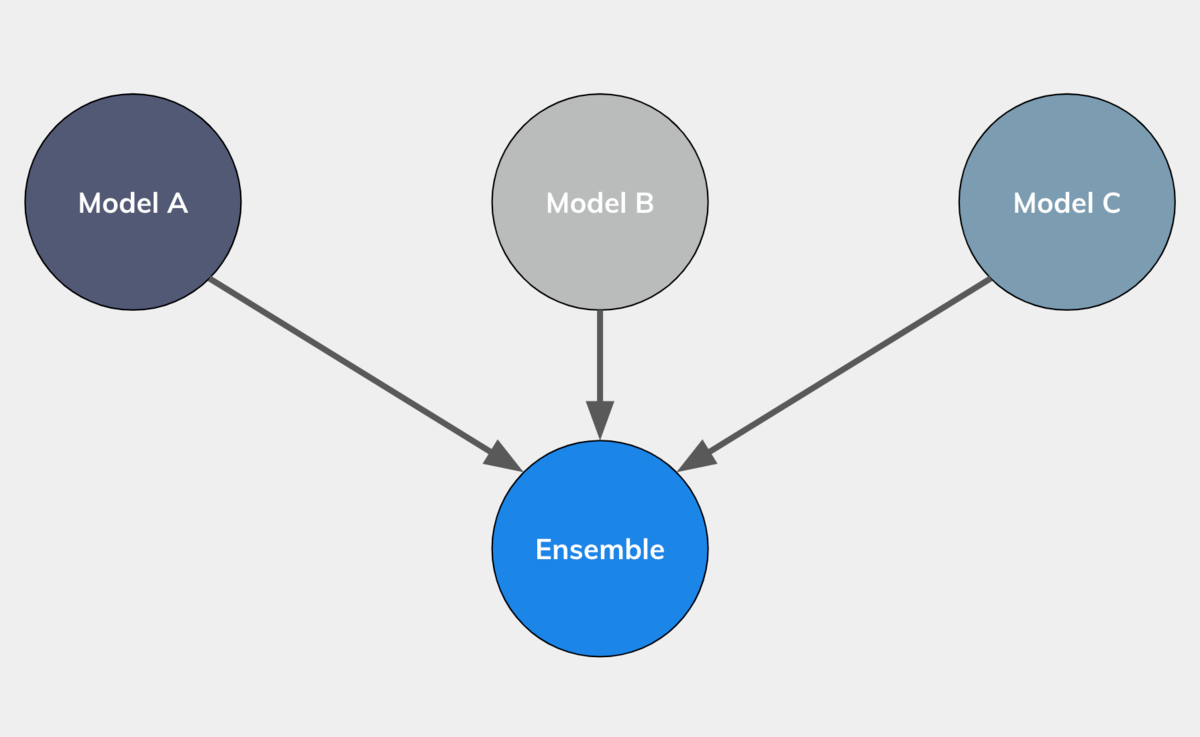



## Ensemble Techniques 

### 1 Max Voting / Voting Classifier 

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.



#### Let's use the iris dataset and understand in detail

In [36]:
# Libraries

from sklearn import datasets

iris = datasets.load_iris()


In [37]:
# For training and testing

x = iris.data[:, :4]
y = iris.target

In [38]:
# Library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [39]:
# Ensemble of Models 

estimators = []

estimators.append(('LR', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 200)))
estimators.append(('SVC', SVC(gamma='auto', probability= True)))
estimators.append(('DTC', DecisionTreeClassifier()))




Voting Classifier supports two types of votings.

Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction. 

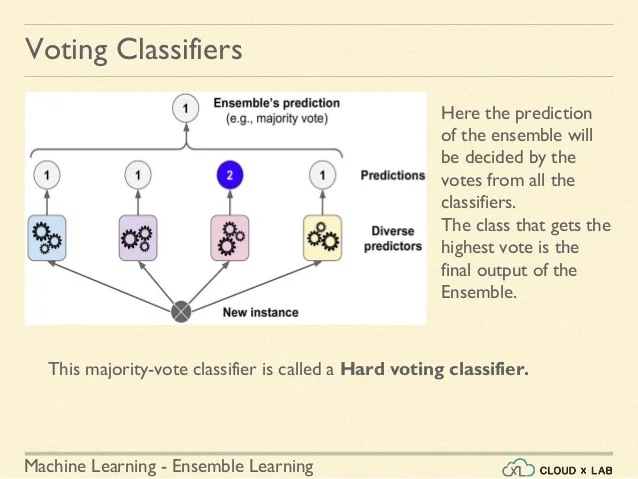



In [40]:
# Voting Classifier with hard voting 
from sklearn.ensemble import VotingClassifier


hard_voting = VotingClassifier(estimators= estimators, voting='hard')
hard_voting.fit(x_train, y_train)


VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('DTC', DecisionTreeClassifier())])

In [41]:
y_pred = hard_voting.predict(x_test)
y_pred[:5]

array([1, 0, 2, 1, 1])

In [42]:
y_test[:5]

array([1, 0, 2, 1, 1])

In [43]:
# accuracy_score metric to predict Accuracy 
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)

print("Hard Voting Score % d" % score) 

Hard Voting Score  1




#### Soft Voting:
In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.


In [44]:
soft_voting = VotingClassifier(estimators= estimators, voting='soft')
soft_voting.fit(x_train, y_train)


VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('DTC', DecisionTreeClassifier())],
                 voting='soft')

In [45]:
y_pred = soft_voting.predict(x_test)
y_pred[:5]

array([1, 0, 2, 1, 1])

In [46]:
score = accuracy_score(y_test, y_pred)

print("Soft Voting Score % d" % score) 

Soft Voting Score  1


### Averaging 
Multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

The simplest way to develop a model averaging ensemble in Keras is to train multiple models on the same dataset then combine the predictions from each of the trained models.

We will use a small multi-class classification problem as the basis to demonstrate a model averaging ensemble.

The scikit-learn class provides the make_blobs() function that can be used to create a multi-class classification problem with the prescribed number of samples, input variables, classes, and variance of samples within a class.

We use this problem with 500 examples, with input variables to represent the x and y coordinates of the points and a standard deviation of 2.0 for points within each group. We will use the same random state to ensure that we always get the same 500 points.

In [47]:
# Libraries

from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame



In [48]:
# generate 2d classification dataset

X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)



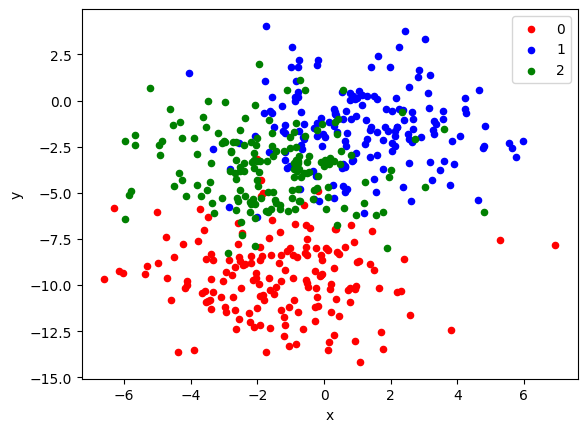

In [49]:
# scatter plot, dots colored by class value

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

We can see that the standard deviation of 2.0 means that the classes are not linearly separable (separable by a line) causing many ambiguous points.

#### So in summary for every instance of test dataset, the average predictions are calculated. This method often reduces overfit and creates a smoother regression model.